## Detecção de Emoções em Imagens com Inteligência Artificial

## Teste

In [7]:
from scipy import misc
import numpy as np
import matplotlib.cm as cm
import tensorflow.compat.v1 as tf
import os, sys, inspect
from datetime import datetime
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from modulos import utils
from modulos.utils import testResult

from tensorflow.python.framework import ops
from sklearn.metrics.classification import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
import warnings
%matplotlib inline

In [8]:
warnings.filterwarnings("ignore")
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
ops.reset_default_graph()

In [9]:
emotion = {0:'anger', 
           1:'disgust',
           2:'fear',
           3:'happy',
           4:'sad',
           5:'surprise',
           6:'neutral'}

In [10]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [11]:
sess = tf.InteractiveSession()

In [13]:
tf.compat.v1.disable_eager_execution()
new_saver = tf.train.import_meta_graph('modelo/model.ckpt-900.meta')
new_saver.restore(sess, 'modelo/model.ckpt-900')
tf.get_default_graph().as_graph_def()

INFO:tensorflow:Restoring parameters from modelo/model.ckpt-900


node {
  name: "truncated_normal/shape"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
          dim {
            size: 4
          }
        }
        tensor_content: "\005\000\000\000\005\000\000\000\001\000\000\000 \000\000\000"
      }
    }
  }
}
node {
  name: "truncated_normal/mean"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_FLOAT
        tensor_shape {
        }
        float_val: 0.0
      }
    }
  }
}
node {
  name: "truncated_normal/stddev"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_FLOAT
        tensor_shape {
        }
        float_val: 0.019999999552965164
      }
    }
  }
}
node {
  name: "truncated_normal/Truncated

In [14]:
x = sess.graph.get_tensor_by_name("input:0")
y_conv = sess.graph.get_tensor_by_name("output:0")

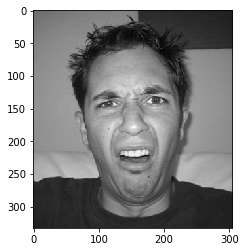

In [15]:
img = mpimg.imread('images_teste/image05.jpg')     
gray = rgb2gray(img)
plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.show()

In [16]:
image_0 = np.resize(gray,(1,48,48,1))
tResult = testResult()
num_evaluations = 50

In [17]:
for i in range(0, num_evaluations):
    result = sess.run(y_conv, feed_dict={x:image_0})
    label = sess.run(tf.argmax(result, 1))
    label = label[0]
    label = int(label)
    tResult.evaluate(label)
tResult.display_result(num_evaluations)

anger = 0.0%
disgust = 0.0%
fear = 92.0%
happy = 6.0%
sad = 2.0%
surprise = 0.0%
neutral = 0.0%
